In [181]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

torch.set_printoptions(edgeitems=2, linewidth=75)
torch.manual_seed(123)

In [182]:
import os
pwd=os.environ['PWD']
pwd

'/root/nlp/dlwpt-code'

In [183]:
from torchvision import datasets
# data_path = '../data-unversioned/p1ch7/'
data_path = pwd + '/data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True) # <1>
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) # <2>

Files already downloaded and verified
Files already downloaded and verified


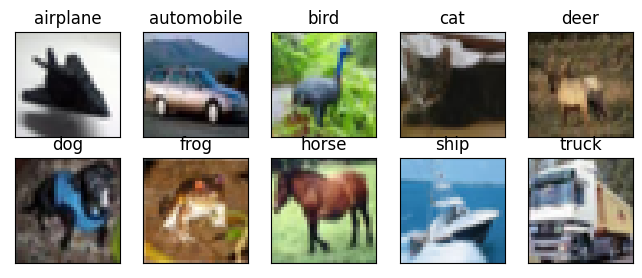

In [184]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

In [185]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 object)

In [186]:
len(cifar10)

50000

In [187]:
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

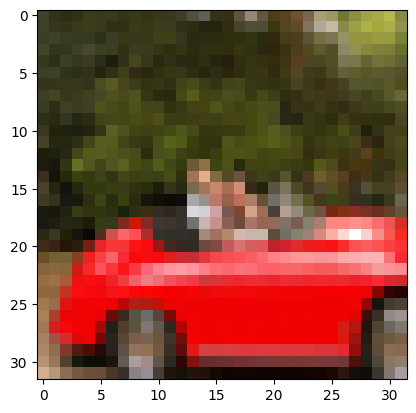

In [188]:
plt.imshow(img)
plt.show()

In [189]:
from torchvision import transforms
dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'FiveCrop',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'transforms']

In [190]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [191]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.ToTensor())

In [192]:
img_t, x = tensor_cifar10[99]
type(img_t), x

(torch.Tensor, 1)

In [193]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [194]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

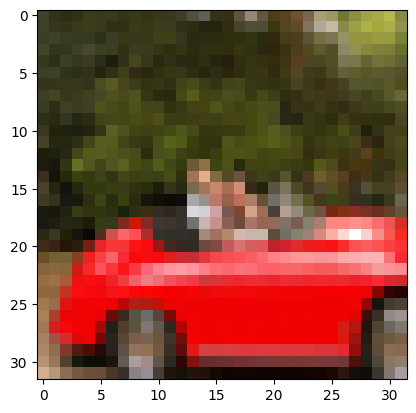

In [195]:
plt.imshow(img_t.permute(1, 2, 0))  # <1>
plt.show()

In [196]:
a=[img_t for img_t, _ in tensor_cifar10]
a[0].shape, a[0]

(torch.Size([3, 32, 32]),
 tensor([[[0.2314, 0.1686,  ..., 0.5961, 0.5804],
          [0.0627, 0.0000,  ..., 0.4667, 0.4784],
          ...,
          [0.7059, 0.6784,  ..., 0.3804, 0.3255],
          [0.6941, 0.6588,  ..., 0.5922, 0.4824]],
 
         [[0.2431, 0.1804,  ..., 0.4902, 0.4863],
          [0.0784, 0.0000,  ..., 0.3255, 0.3412],
          ...,
          [0.5451, 0.4824,  ..., 0.2431, 0.2078],
          [0.5647, 0.5059,  ..., 0.4627, 0.3608]],
 
         [[0.2471, 0.1765,  ..., 0.4000, 0.4039],
          [0.0784, 0.0000,  ..., 0.1961, 0.2235],
          ...,
          [0.3765, 0.1647,  ..., 0.1333, 0.1333],
          [0.4549, 0.3686,  ..., 0.3294, 0.2824]]]))

In [207]:
a=np.arange(27).reshape(3,3,3) # CHANNEL X ROW X COLUMN
b=[torch.from_numpy(a) for i in range(5)] # 5相当于5张照片
b

[tensor([[[ 0,  1,  2],
          [ 3,  4,  5],
          [ 6,  7,  8]],
 
         [[ 9, 10, 11],
          [12, 13, 14],
          [15, 16, 17]],
 
         [[18, 19, 20],
          [21, 22, 23],
          [24, 25, 26]]]),
 tensor([[[ 0,  1,  2],
          [ 3,  4,  5],
          [ 6,  7,  8]],
 
         [[ 9, 10, 11],
          [12, 13, 14],
          [15, 16, 17]],
 
         [[18, 19, 20],
          [21, 22, 23],
          [24, 25, 26]]]),
 tensor([[[ 0,  1,  2],
          [ 3,  4,  5],
          [ 6,  7,  8]],
 
         [[ 9, 10, 11],
          [12, 13, 14],
          [15, 16, 17]],
 
         [[18, 19, 20],
          [21, 22, 23],
          [24, 25, 26]]]),
 tensor([[[ 0,  1,  2],
          [ 3,  4,  5],
          [ 6,  7,  8]],
 
         [[ 9, 10, 11],
          [12, 13, 14],
          [15, 16, 17]],
 
         [[18, 19, 20],
          [21, 22, 23],
          [24, 25, 26]]]),
 tensor([[[ 0,  1,  2],
          [ 3,  4,  5],
          [ 6,  7,  8]],
 
         [[ 9, 10, 11],
 

In [209]:
# https://pytorch.org/docs/stable/generated/torch.stack.html
c=torch.stack(b, dim=3)
(c,c.shape,
    c[0], # 相当于RGB的R-channel
    c[0][0], 
    c[0][1]
)

(tensor([[[[ 0,  0,  0,  0,  0],
           [ 1,  1,  1,  1,  1],
           [ 2,  2,  2,  2,  2]],
 
          [[ 3,  3,  3,  3,  3],
           [ 4,  4,  4,  4,  4],
           [ 5,  5,  5,  5,  5]],
 
          [[ 6,  6,  6,  6,  6],
           [ 7,  7,  7,  7,  7],
           [ 8,  8,  8,  8,  8]]],
 
 
         [[[ 9,  9,  9,  9,  9],
           [10, 10, 10, 10, 10],
           [11, 11, 11, 11, 11]],
 
          [[12, 12, 12, 12, 12],
           [13, 13, 13, 13, 13],
           [14, 14, 14, 14, 14]],
 
          [[15, 15, 15, 15, 15],
           [16, 16, 16, 16, 16],
           [17, 17, 17, 17, 17]]],
 
 
         [[[18, 18, 18, 18, 18],
           [19, 19, 19, 19, 19],
           [20, 20, 20, 20, 20]],
 
          [[21, 21, 21, 21, 21],
           [22, 22, 22, 22, 22],
           [23, 23, 23, 23, 23]],
 
          [[24, 24, 24, 24, 24],
           [25, 25, 25, 25, 25],
           [26, 26, 26, 26, 26]]]]),
 torch.Size([3, 3, 3, 5]),
 tensor([[[0, 0, 0, 0, 0],
          [1, 1, 1, 1

In [199]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [200]:
imgs[0].shape, imgs[0] # 所有图片，一个channel的值

(torch.Size([32, 32, 50000]),
 tensor([[[0.2314, 0.6039,  ..., 0.7412, 0.8980],
          [0.1686, 0.4941,  ..., 0.7294, 0.9255],
          ...,
          [0.5961, 0.3412,  ..., 0.6745, 0.8667],
          [0.5804, 0.3098,  ..., 0.6627, 0.8706]],
 
         [[0.0627, 0.5490,  ..., 0.7608, 0.8706],
          [0.0000, 0.5686,  ..., 0.7490, 0.9373],
          ...,
          [0.4667, 0.3020,  ..., 0.6706, 0.8902],
          [0.4784, 0.2784,  ..., 0.6549, 0.8235]],
 
         ...,
 
         [[0.7059, 0.6471,  ..., 0.7765, 0.5373],
          [0.6784, 0.6118,  ..., 0.7412, 0.5098],
          ...,
          [0.3804, 0.4824,  ..., 0.6863, 0.7922],
          [0.3255, 0.5137,  ..., 0.6863, 0.8314]],
 
         [[0.6941, 0.6392,  ..., 0.7765, 0.4784],
          [0.6588, 0.6196,  ..., 0.7412, 0.4627],
          ...,
          [0.5922, 0.5608,  ..., 0.7686, 0.6431],
          [0.4824, 0.5608,  ..., 0.7647, 0.6392]]]))

In [201]:
imgs.view(3, -1).mean(dim=1)  # <1>

tensor([0.4915, 0.4823, 0.4468])

In [210]:
imgs.view(3, -1).shape

torch.Size([3, 51200000])

In [202]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [203]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [204]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [205]:
transformed_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


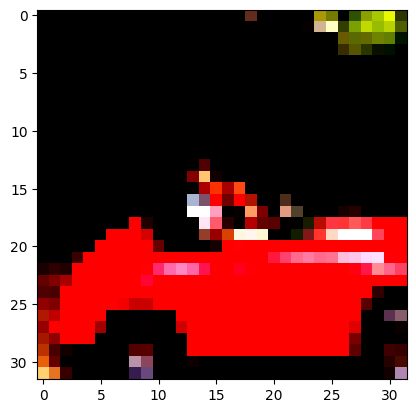

In [206]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()